## Titanic Survival

Importing python libraries to use for analysis:

In [1]:
# Data wrangling
import os
import pandas
import numpy

# Data visualisation
import matplotlib.pyplot as plt
import seaborn

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit, ShuffleSplit, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

Import Titanic dataset as DataFrame

In [2]:
titanic = pandas.read_csv(os.path.join('datasets', 'titanic3.csv'))

Print feature names

In [3]:
print(titanic.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


What the keys mean:

```
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
survival        Survival
                (0 = No; 1 = Yes)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
boat            Lifeboat
body            Body Identification Number
home.dest       Home/Destination
```

### Explore data

In [4]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [6]:
titanic.describe()

C:\Users\Chris\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
50%,3.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
75%,3.000000,1.000000,NaN,1.000000,0.000000,NaN,NaN
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
titanic.describe(include=['O'])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


There were 1309 total passengers. I will discard the "boat" and "body" columns for any classification into survived vs not survived as they already contain this information. I will drop "cabin" data as it has a lot of missing values and so is unlikely to have a large impact on prediction. I will also drop "home.dist" and "ticket" as they contain a lot of unique values. "age" and "fare" data will need to be completed as the machine learning algorithms do not work with incomplete data.

There were three classes of ticket, males accounted for 64% of passengers and 70% of passengers embarked from Southampton.

Dropping columns from the dataset:

In [8]:
titanic = titanic.drop(['boat', 'body', 'ticket', 'cabin', 'home.dest'], axis=1)

Completing the missing data in "age" and "fare" using the median of each. This will unfortunately introduce some noise into the errors.

In [9]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['fare'].fillna(titanic['fare'].median(), inplace=True)

View our revised dataset:

In [10]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.503183,0.498854,0.385027,33.281086
std,0.837836,0.486055,12.905246,1.041658,0.865560,51.741500
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [11]:
titanic.describe(include=['O'])

,name,sex,embarked
count,1309,1309,1307
unique,1307,2,3
top,"Connolly, Miss. Kate",male,S
freq,2,843,914


Next I will extract title data from the "name" columns as they may contain useful information on survival:

In [12]:
titanic['Title'] = titanic.name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [13]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,Title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,Mrs


A new column called "Title" has been added to the dataset. Pivoting "Title" against "survived", I can see what the survival rates for each were.

In [14]:
titanic[['Title', 'survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Title', ascending=True)

,Title,survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dona,1.000000
5,Dr,0.500000
6,Jonkheer,0.000000
7,Lady,1.000000
8,Major,0.500000
9,Master,0.508197


It is immediately clear from the "Title" data that those with female titles had a far higher chance of survival than those with male titles. Males with the title 'Master' had a significantly higher survival rate than males with the title 'Mr', 51% vs 16%. This suggests that age had an effect on survival rate for males.

'Mme', 'Mlle' and 'Ms' are french titles. I will group these in with their respective english titles. Those with rare female titles 'Lady', 'Countess', 'Dona' all survived so I will group these together. I will group all the rare male titles into one title but for 'Rev'. All 'Rev' died which provides useful information for classification.

In [15]:
titanic['Title'] = titanic['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess', 'Dona'], 'Rare female')
titanic['Title'] = titanic['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Sir'], 'Rare male')

In [16]:
pandas.crosstab(titanic['Title'], titanic['survived'])

survived,0,1
Title,,
Master,30,31
Miss,85,179
Mr,634,123
Mrs,42,156
Rare female,0,3
Rare male,10,8
Rev,8,0


I can now drop "name" from the dataset.

In [17]:
titanic = titanic.drop(['name'], axis=1)

Did "sex" have an effect on survival rate:

In [18]:
titanic[['sex', 'survived']].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.727468
1,male,0.190985


'female' had a survival rate of 73% whereas 'male' only had a survival rate of 19%. This confirms the suggestion revealed in the "Title" data. The algorithms will not recognise the strings 'female' and 'male' so I will need to convert them into binary values 0 and 1:

In [19]:
# Transform Sex into binary values 0 and 1
titanic['sex'] = titanic['sex'].replace(['female'], 1)
titanic['sex'] = titanic['sex'].replace(['male'], 0)

# Checking the transformation
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,Title
0,1,1,1,29.0000,0,0,211.3375,S,Miss
1,1,1,0,0.9167,1,2,151.5500,S,Master
2,1,0,1,2.0000,1,2,151.5500,S,Miss
3,1,0,0,30.0000,1,2,151.5500,S,Mr
4,1,0,1,25.0000,1,2,151.5500,S,Mrs


Visualising survival by age:

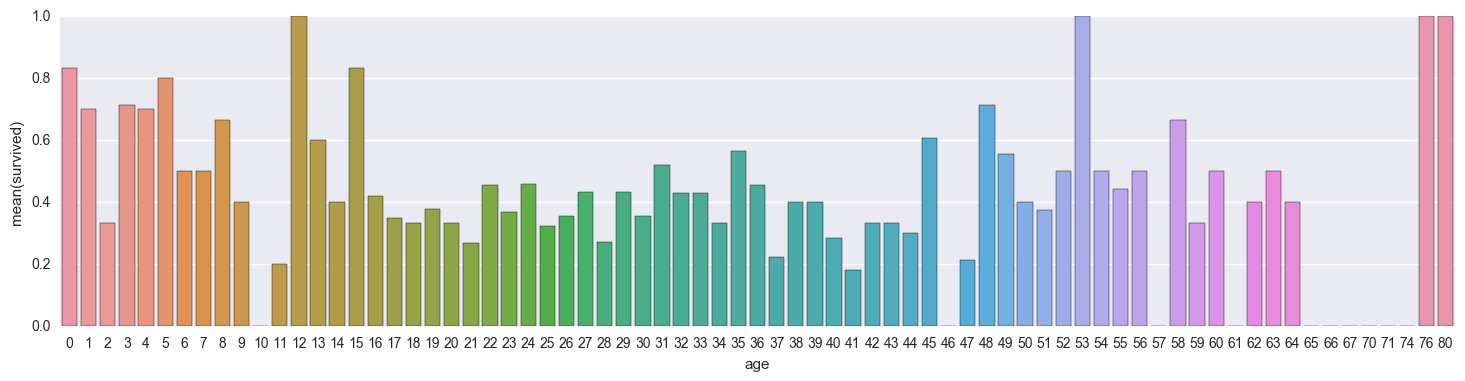

In [20]:
# Convert floats to int for better visualisation
titanic['age'] = titanic['age'].astype(int)

# Mean survival of passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic[["age", "survived"]].groupby(['age'],as_index=False).mean()
seaborn.barplot(x='age', y='survived', data=average_age)
plt.show()

Children under the age of 16 had a higher survival rate than adults.

In [21]:
titanic[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.619195
1,2,0.429603
2,3,0.255289


First class passengers had the highest survival rate at 62%.

In [22]:
titanic[['embarked', 'survived']].groupby(['embarked'], as_index=False).mean().sort_values(by='survived', ascending=False)

,embarked,survived
0,C,0.555556
1,Q,0.357724
2,S,0.332604


More than 50% of those who embarked from Cherbourg survived

In [23]:
titanic[['sibsp', 'survived']].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sibsp,survived
1,1,0.510972
2,2,0.452381
0,0,0.346801
3,3,0.300000
4,4,0.136364
5,5,0.000000
6,8,0.000000


sibsp=1 had the highest survival rate

In [24]:
titanic[['parch', 'survived']].groupby(['parch'], as_index=False).mean().sort_values(by='survived', ascending=False)

,parch,survived
3,3,0.625000
1,1,0.588235
2,2,0.504425
0,0,0.335329
4,4,0.166667
5,5,0.166667
6,6,0.000000
7,9,0.000000


### Modelling Survival on the Titanic

Transform categorical features into dummy variables using the pandas 'get_dummies' function:

In [25]:
titanic_features = pandas.get_dummies(titanic, columns=['embarked', 'Title', 'pclass', 'parch', 'sibsp'])

In [26]:
titanic_features.head()

,survived,sex,age,fare,embarked_C,embarked_Q,embarked_S,Title_Master,Title_Miss,Title_Mr,...,parch_5,parch_6,parch_9,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8
0,1,1,29,211.3375,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,151.5500,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1,2,151.5500,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,0,30,151.5500,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,1,25,151.5500,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Drop survived column from features
titanic_features = titanic_features.drop(['survived'], axis=1)

In [28]:
labels = titanic.survived.values
data = titanic_features.values

Split the data into training and test sets so that I have some unseen data with which to test the accuracy of the model on. However, as the quantity of data is low and therefore precious for training the model, I would prefer to be able to use all of the data for training. I can achieve this by using cross validation. Cross validation splits the data repeatedly into training and non-overlapping test-sets, with separate models built for every pair. The test-set scores are then aggregated for a more robust estimate.

I have chosen to use ShuffleSplit which first shuffles the data before dividing into training and test sets. 20% of the data will be reserved for testing in each split.

In [29]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=0)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

Logistic regression, K-nearest neighbors and support vector machines calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore the range of features needs to be normalised so that each feature contributes approximately proportionately to the final distance. I do this by applying  StandardScaler.

Feature scaling is applied to gradient descent as it converges much faster with feature scaling than without.

In [30]:
scaler = StandardScaler().fit(train_data)
train_data_s = scaler.transform(train_data)
test_data_s = scaler.transform(test_data)

In [31]:
acc_rf = numpy.mean(cross_val_score(RandomForestClassifier(n_estimators=100), train_data, train_labels, cv=cv))
acc_dt = numpy.mean(cross_val_score(DecisionTreeClassifier(), train_data, train_labels, cv=cv))
acc_ab = numpy.mean(cross_val_score(AdaBoostClassifier(n_estimators=100), train_data, train_labels, cv=cv))
acc_gb = numpy.mean(cross_val_score(GradientBoostingClassifier(n_estimators=100), train_data, train_labels, cv=cv))
acc_nb = numpy.mean(cross_val_score(GaussianNB(), train_data, train_labels, cv=cv))
acc_gd = numpy.mean(cross_val_score(SGDClassifier(), train_data_s, train_labels, cv=cv))


acc_rf = round(acc_rf * 100, 2)
acc_dt = round(acc_dt * 100, 2)
acc_ab = round(acc_ab * 100, 2)
acc_gb = round(acc_gb * 100, 2)
acc_nb = round(acc_nb * 100, 2)
acc_gd = round(acc_gd * 100, 2)

print("Random forest test accuracy: %f" % acc_rf)
print("Decision tree test accuracy: %f" % acc_dt)
print("AdaBoost test accuracy: %f" % acc_ab)
print("Gradient boosting test accuracy: %f" % acc_gb)
print("Naive bayes test accuracy: %f" % acc_nb)
print("Gradient descent test accuracy: %f" % acc_gd)

Random forest test accuracy: 79.490000
Decision tree test accuracy: 75.480000
AdaBoost test accuracy: 80.000000
Gradient boosting test accuracy: 80.960000
Naive bayes test accuracy: 43.050000
Gradient descent test accuracy: 72.080000


GridSearchCV allows us to optimise the parameter values for the estimators.

In [32]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=cv, verbose=1)
grid.fit(train_data_s, train_labels)
print('Logistic regression best parameters:', grid.best_params_)
print('Logistic regression best accuracy:', grid.best_score_)
print("Logistic regression test accuracy: %f" % grid.score(test_data_s, test_labels))
acc_log = round(grid.score(test_data_s, test_labels) * 100, 2)

param_grid = {'n_neighbors': [1, 3, 5, 10, 20]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=cv, verbose=1)
grid.fit(train_data_s, train_labels)
print('knn best parameters:', grid.best_params_)
print('knn best accuracy:', grid.best_score_)
print("knn test accuracy: %f" % grid.score(test_data_s, test_labels))
acc_knn = round(grid.score(test_data_s, test_labels) * 100, 2)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv, verbose=1)
grid.fit(train_data_s, train_labels)
print('SVC best parameters:', grid.best_params_)
print('SVC best accuracy:', grid.best_score_)
print("SVC test accuracy: %f" % grid.score(test_data_s, test_labels))
acc_svc = round(grid.score(test_data_s, test_labels) * 100, 2)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LinearSVC(), param_grid=param_grid, cv=cv, verbose=1)
grid.fit(train_data_s, train_labels)
print('LinearSVC best parameters:', grid.best_params_)
print('LinearSVC best accuracy:', grid.best_score_)
print("LinearSVC test accuracy: %f" % grid.score(test_data_s, test_labels))
acc_svc_lin = round(grid.score(test_data_s, test_labels) * 100, 2)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


Logistic regression best parameters: {'C': 0.1}
Logistic regression best accuracy: 0.818781725888
Logistic regression test accuracy: 0.820122
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.8s finished


knn best parameters: {'n_neighbors': 20}
knn best accuracy: 0.79847715736
knn test accuracy: 0.801829
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   20.9s finished


SVC best parameters: {'C': 1, 'gamma': 0.01}
SVC best accuracy: 0.814720812183
SVC test accuracy: 0.810976
Fitting 10 folds for each of 5 candidates, totalling 50 fits
LinearSVC best parameters: {'C': 0.01}
LinearSVC best accuracy: 0.816751269036
LinearSVC test accuracy: 0.810976


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.4s finished


### Model Evaluation

Listing the models in order of testing accuracy:

In [33]:
models = pandas.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Naive Bayes', 'AdaBoost', 'Gradient Boosting',
              'Logistic Regression', 'KNN', 'Support Vector Machine', 'Linear SVC'],
    'Score': [acc_rf, acc_dt, acc_nb, acc_ab, acc_gb, acc_log, acc_knn, acc_svc, acc_svc_lin]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Logistic Regression,82.01
7,Support Vector Machine,81.10
8,Linear SVC,81.10
4,Gradient Boosting,80.96
6,KNN,80.18
3,AdaBoost,80.00
0,Random Forest,79.49
1,Decision Tree,75.48
2,Naive Bayes,43.05


Logistic regression is the strongest performing algorithm predicting 82.01% of outcomes correctly. We can do further model evaluation by drawing learning curves for each algorithm:

Automatically created module for IPython interactive environment


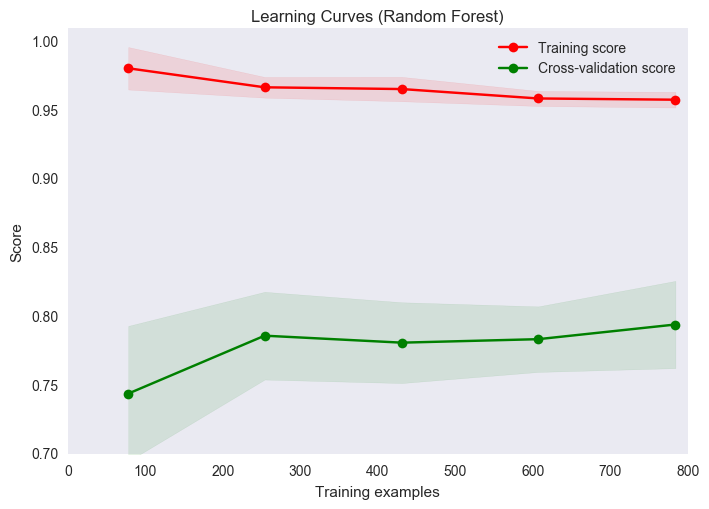

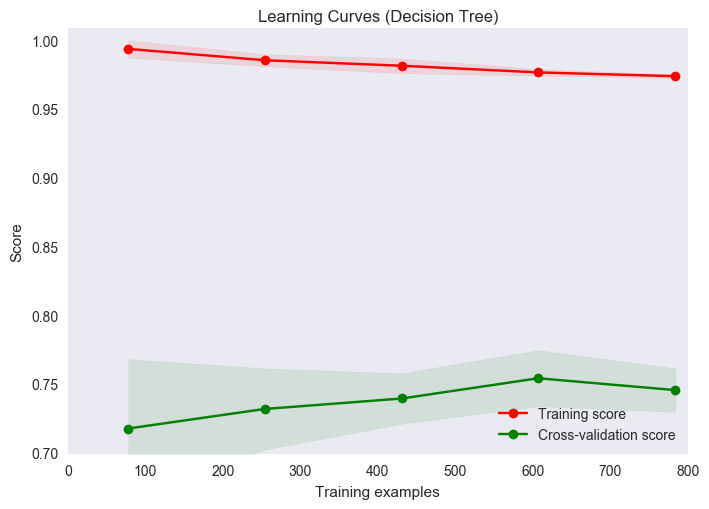

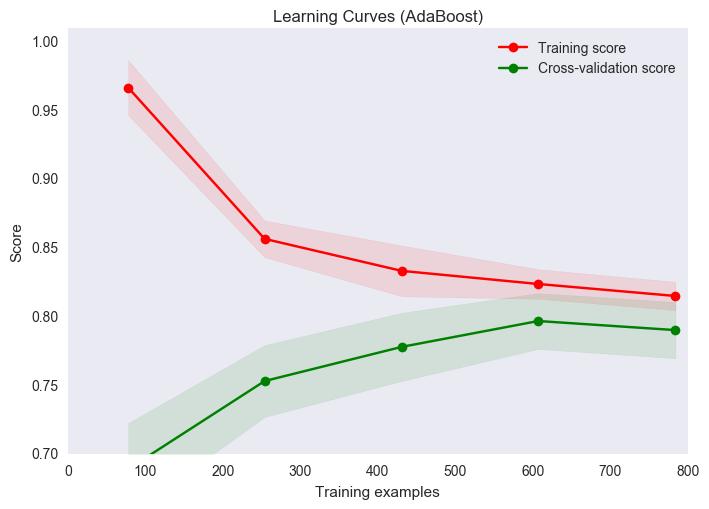

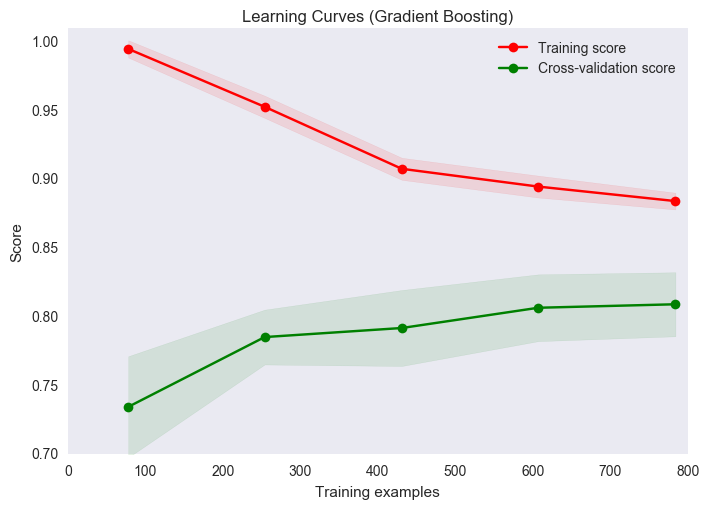

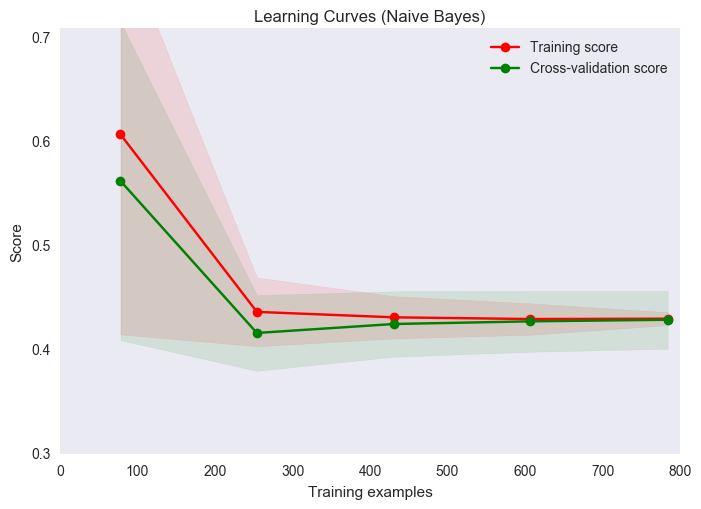

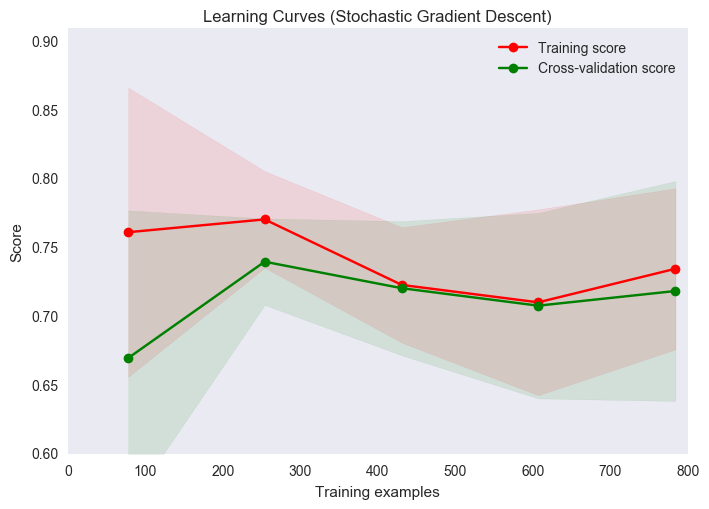

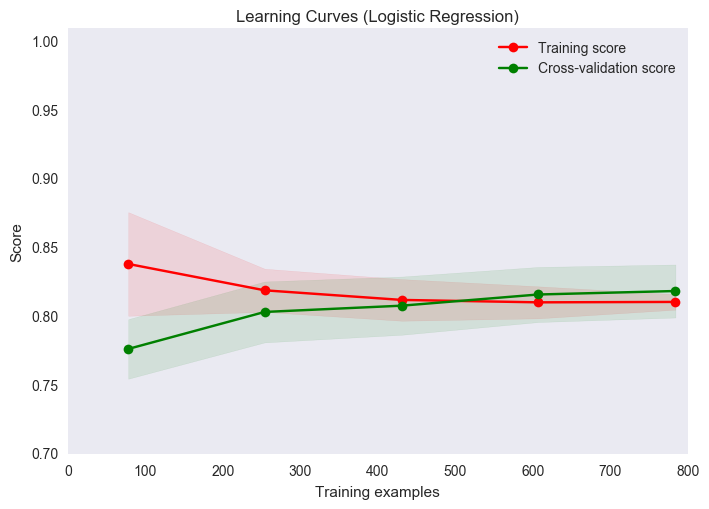

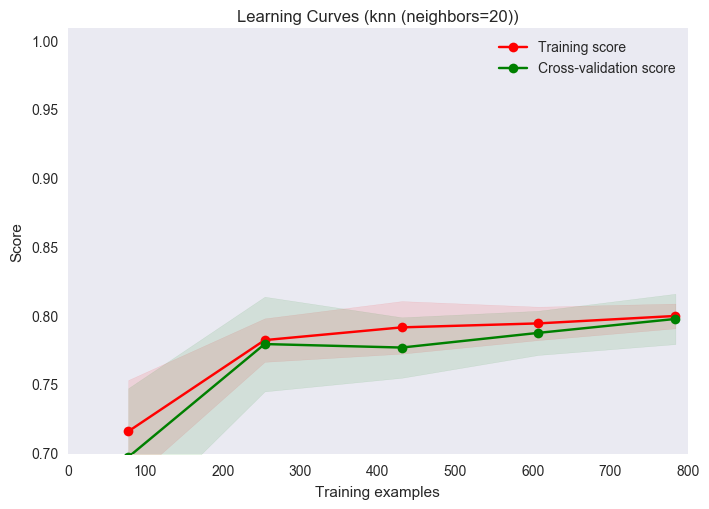

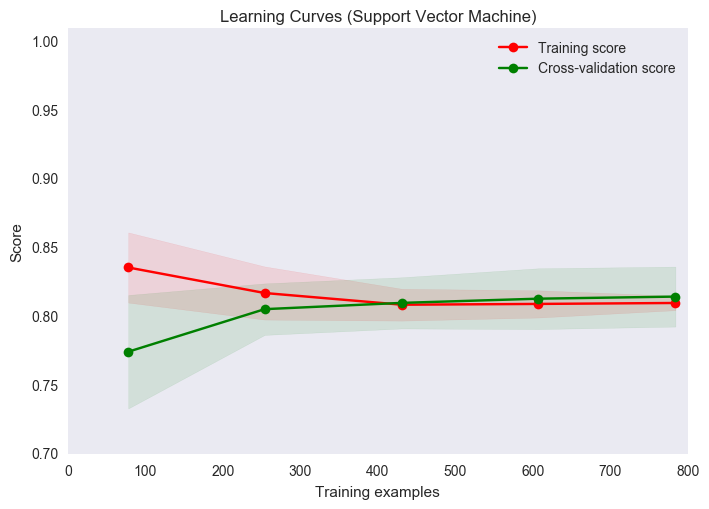

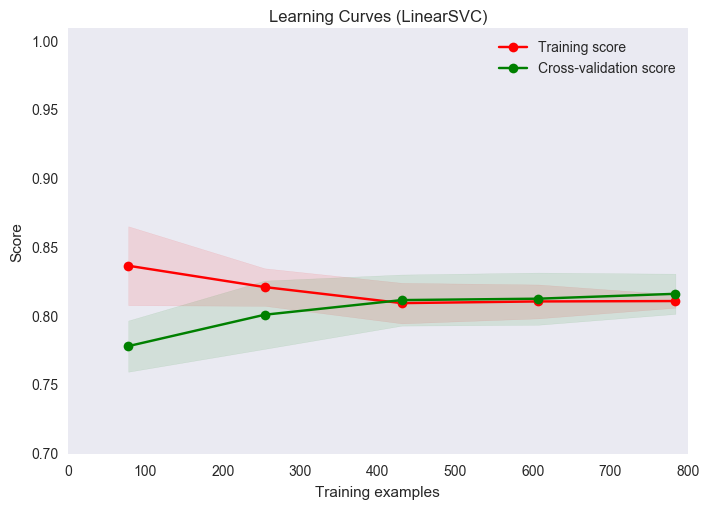

In [34]:
print(__doc__)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=numpy.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = numpy.mean(train_scores, axis=1)
    train_scores_std = numpy.std(train_scores, axis=1)
    test_scores_mean = numpy.mean(test_scores, axis=1)
    test_scores_std = numpy.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = train_data_s, train_labels

title = "Learning Curves (Random Forest)"
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Decision Tree)"
estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (AdaBoost)"
estimator = AdaBoostClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Gradient Boosting)"
estimator = GradientBoostingClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Naive Bayes)"
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.3, 0.71), cv=cv, n_jobs=4)

title = "Learning Curves (Stochastic Gradient Descent)"
estimator = SGDClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.6, 0.91), cv=cv, n_jobs=4)

title = "Learning Curves (Logistic Regression)"
estimator = LogisticRegression(C=0.1)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (knn (neighbors=20))"
estimator = KNeighborsClassifier(n_neighbors=20)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Support Vector Machine)"
estimator = SVC(C=1, gamma=0.01)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (LinearSVC)"
estimator = LinearSVC(C=0.01)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

The tree based classifiers - random forest, decision tree, adaboost and gradient boosting - all exhibit high variance according to the learning curves. That is a very low training error accompanied by a significantly higher cross validation error. This is caused by the models overfitting on training and then not generalising well on testing. Options for improving these models include obtaining more training examples (not possible in this instance), reducing the number of features or increasing regularisation.

The distance based classifiers - logistic regression, k-nearest neighbors and support vector machine - are optimised after only seeing approximately 50% of the data. This means that adding more data (if it were possible) would be unlikely to improve their accuracy. There is scope to add more features to potentially improve the accuracy of these models, polynomial features for example.

I will next try feature selection on the best performing tree based algorithm - Gradient Boosting - to see if I can reduce overfitting and improve generalisation performance.

Features selected by model-based selection:
[ True  True  True  True  True  True  True  True  True False False  True
 False  True False  True False  True False False False False False False
  True  True False  True False False False]


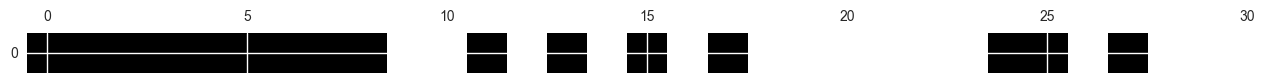

In [35]:
from sklearn.feature_selection import SelectFromModel

feature_selection = SelectFromModel(GradientBoostingClassifier(n_estimators=100), threshold="median")

feature_selection.fit(train_data, train_labels)
print('Features selected by model-based selection:')
print(feature_selection.get_support())
plt.matshow(feature_selection.get_support().reshape(1, -1), cmap='gray_r')
plt.show()

Dropping the features recommended by SelectFromModel:

In [36]:
titanic_features_fs = titanic_features.drop(['Title_Mrs', 'Title_Rare female', 'Title_Rev', 'pclass_2', 'parch_0', 
                                             'parch_2', 'parch_3', 'parch_4', 'parch_5', 'parch_6', 'parch_9', 
                                             'sibsp_2', 'sibsp_4', 'sibsp_5', 'sibsp_8'], axis=1)

Leaves the following features:

In [37]:
titanic_features_fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
sex                1309 non-null int64
age                1309 non-null int32
fare               1309 non-null float64
embarked_C         1309 non-null float64
embarked_Q         1309 non-null float64
embarked_S         1309 non-null float64
Title_Master       1309 non-null float64
Title_Miss         1309 non-null float64
Title_Mr           1309 non-null float64
Title_Rare male    1309 non-null float64
pclass_1           1309 non-null float64
pclass_3           1309 non-null float64
parch_1            1309 non-null float64
sibsp_0            1309 non-null float64
sibsp_1            1309 non-null float64
sibsp_3            1309 non-null float64
dtypes: float64(14), int32(1), int64(1)
memory usage: 158.6 KB


Re-running Gradient Boosting with reduced number of features:

In [38]:
labels = titanic.survived.values
data = titanic_features_fs.values

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=0)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [39]:
acc_gb_fs = numpy.mean(cross_val_score(GradientBoostingClassifier(n_estimators=100), train_data, train_labels, cv=cv))

acc_gb_fs = round(acc_gb_fs * 100, 2)

print("Gradient Boosting test accuracy: %f" % acc_gb_fs)

Gradient Boosting test accuracy: 81.120000


In [40]:
models = pandas.DataFrame({
    'Model': ['Gradient Boosting', 'Gradient Boosting (FS)'],
    'Score': [acc_gb, acc_gb_fs]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Gradient Boosting (FS),81.12
0,Gradient Boosting,80.96


Reducing the number of features has marginally improved the testing performance of the Gradient Boosting algorithm.